In [1]:
!python setup.py build_ext --inplace

import numpy as np
import matplotlib.pyplot as plt
import bh_potential as bh
import time

# Create normally distributed test data
N_pot = 10000 # number of particles
M_pot = 3e12 # total mass in m_sun
R_pot = 100 # standard deviation in kpc

positions = np.random.normal(0, R_pot, (N_pot, 3))
masses = np.asarray([M_pot/N_pot]*N_pot)

running build_ext


In [2]:
t0 = time.time()

# Build the octree
octree = bh.Octree(positions, masses)
t1 = time.time()
print('built tree using %i particles in %0.1f seconds' % (len(positions), t1-t0))

t0 = time.time()

# Evaluate the potential at the same positions
potentials = octree.compute_potentials(positions)
t1 = time.time()
print('evaluated potential for %i particles in %0.1f seconds' % (len(positions), t1-t0))

built tree using 10000 particles in 0.1 seconds
evaluated potential for 10000 particles in 0.2 seconds


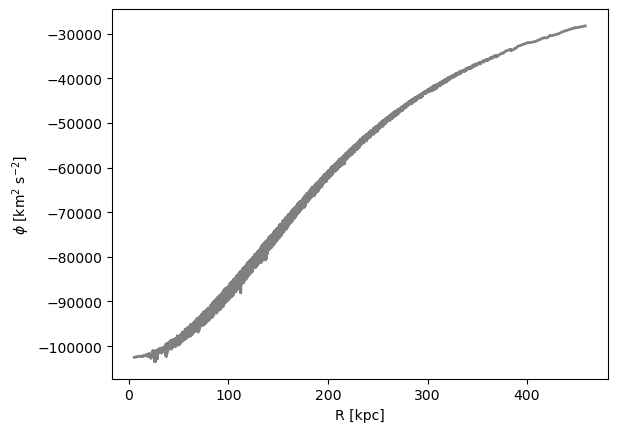

In [3]:
r = np.sqrt(np.sum(positions**2, axis=1))
s = np.argsort(r)

plt.plot(r[s], potentials[s], color='grey', lw=2, ls='-', label='Barnes-Hut')
plt.xlabel('R [kpc]')
plt.ylabel('$\phi$ [km$^{2}$ s$^{-2}$]');